In [1]:
import sys 
sys.path.append('../')
import torch 
import matplotlib.pyplot as plt
from utils import * 
from mlmm import *
from dataset import reference_test, load_dataset_1d
import plotly.express as px

In [2]:
l = 6 # number of level, total number of points is 2^l-1
k = 2 # number of corase level
m = 7 # local range for correction
order = 2 # order of interpolation/restriction

In [3]:
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')

In [4]:
wh_ref = multi_summation(Khh, uh, h)

In [5]:
KHh = injection1d_rows(Khh) 
KHH = injection1d_cols(KHh)
KHh_smooth = interp1d_cols(KHH, order=order) # \tilde{K}
KHh_corr_even = KHh - KHh_smooth

Khh_smooth = interp1d_rows(KHh, order=order)
Khh_corr = Khh - Khh_smooth
# Khh_corr[:,:,::2] = KHh_corr_even

# uh_ext = 
uH = restrict1d(uh, order=order)
xH = injection1d(xh)
H = h*2

In [6]:
# plt.plot(xH[0,0,:5], KHH[0,0,2,:5], '-b')
# plt.plot(xh[0,0,:10], Khh[0,0,2,:10], '-r')
# plt.plot(xH[0,0,:5], uH[0,0,:5], '-b')
# plt.plot(xh[0,0,:10], uh[0,0,:10], '--r')
# plt.plot(xH[0,0,:5], uH[0,0,:5]*KHH[0,0,1,:5], '--b')
# plt.plot(xh[0,0,:10], uh[0,0,:10]*Khh[0,0,1,:10], '--r')

In [7]:
multi_summation(Khh_smooth, uh, h)[0,0]

tensor([-63.8663, -64.0783, -64.2904,  ..., -64.2906, -64.0786, -63.8665])

In [8]:
interp1d(multi_summation(KHH, uH, H))

tensor([[[-66.1924, -66.3959, -66.5995,  ..., -66.5995, -66.3959, -66.1923]]])

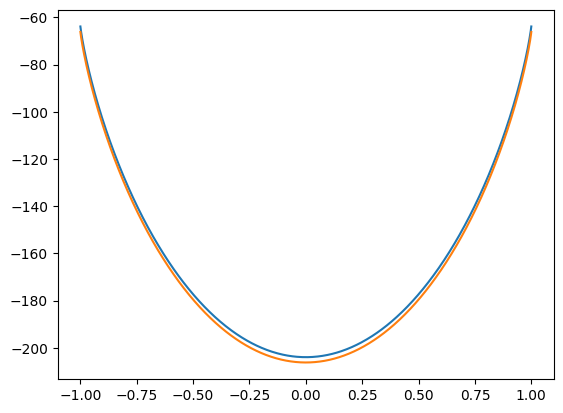

In [9]:
plt.plot(xh[0,0], multi_summation(Khh_smooth, uh, h)[0,0])
plt.plot(xH[0,0], multi_summation(KHH, uH, H)[0,0])

In [38]:
uh_ = interp1d(uH)

In [27]:
px.imshow(Khh_corr[0,0])